<a href="https://colab.research.google.com/github/9645258/aiffel/blob/main/01_exploration/%5BE-07%5Dexploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🎄 EXPLORATION 07**

- **🌲 EXPLORATION 07-1 : 학습**  
- **🌲 EXPLORATION 07-2 : 라이브러리 import**  
- **🌲 EXPLORATION 07-3 : 추상적 요약**  
    - **🌿 01_데이터 import**  
    - **🌿 02_데이터 확인**
    - **🌿 03_기본 전처리**  
        - 03-1_중복 샘플 및 비어있는 값 제거  
        - 03-2_텍스트 정규화  
        - 03-3_불용어 제거  
        - 03-4_데이터 전처리 함수  
        - 03-5_전처리 결과 확인  
        - 03-6_최종 정제 데이터 재저장 및 최종 확인  
    - **🌿 04_길이 설정 및 시작 토큰, 종료 토큰 추가**  
        - 04-1_길이 분포 출력  
        - 04-2_길이 분포를 활용해 적절한 최대 길이 설정  
        - 04-3_샘플 비율 확인  
        - 04-4_전체 샘플 수 확인  
        - 04-5_시작 토큰 및 종료 토큰 추가  
        - 04-6_인코더(입력), 디코더(입력, 레이블) 저장  
    - **🌿 05_평가 데이터셋 분리**  
        - 05-1_정수 시퀀스 생성 및 순서 정의  
        - 05-2_훈련 데이터와 테스트 데이터 분리  
    - **🌿 06_단어 집합 생성 및 정수 인코딩**  
        - 06-1_훈련 데이터 토크나이저  
        - 06-2_훈련 데이터 단어 등장 빈도 확인  
        - 06-3_훈련 데이터 단어 집합 크기 재설정  
        - 06-4_headlines 데이터 토크나이저  
        - 06-5_headlines 데이터 단어 등장 빈도 확인  
        - 06-6_headlines 데이터 집합 크기 재설정  
        - 06-7_패딩  
    - **🌿 07_모델 설계**        
        - 07-1_인코더 모델 설계  
        - 07-2_디코더 모델 설계  
        - 07-3_모델 정의  
        - 07-4_모델 확인  
        - 07-5_어텐션 메커니즘 함수 설계  
        - 07-6_어텐션 메커니즘 함수 모델 정의  
        - 07-7_어텐션 메커니즘 함수 모델 확인  
    - **🌿 08_모델 훈련**  
        - 08-1_모델 훈련  
        - 08-2_모델 훈련 시각화  
    - **🌿 09_인퍼런스 모델 구현**  
        - 09-1_텍스트 데이터를 실제 데이터로 복원  
        - 09-2_인퍼런스 모델 설계  
        - 09-3_어텐션 메커니즘 출력층 설계  
        - 09-4_인퍼런스 단계에서 단어 시퀀스를 완성하는 함수 제작  
    - **🌿 10_모델 테스트**  
        - 10-1_정수 시퀀스를 텍스트 시퀀스로 변환  
        - 10-2_실제 요약 및 예측 요약 비교  
    - **🌿 11_테스트 결과**  
- **🌲 EXPLORATION 07-4 : 추출적 요약**  
    - **🌿 01_데이터 import**  
    - **🌿 02_데이터 요약**  
    - **🌿 03_테스트 결과**  
- **🌲 EXPLORATION 07-5 : 결론**  


<hr>

# **🌲 EXPLORATION 07-1 : 학습**

- **텍스트 요약(Text Summarization)**  
긴 길이의 문서 원문을 핵심 주제만으로 구성된 짧은 요약 문장들로 변환  
요약 전후에 정보 손실 발생이 최소화되어야 함  
    - **추출적 요약(Extractive Summarization)**  
    원문에서 문장들을 추출해서 요약하는 방식   
    문장 분류(Text Classification) 문제로 볼 수 있음  
    - **추상적 요약(Abstractive Summarization)**  
    원문으로부터 내용이 요약된 새로운 문장을 생성  
    결과로 나온 문장이 원문에 원래 없던 문장일 수도 있음  
    자연어 생성(Natural Language Generation, NLG)의 영역  
- **RNN(Recurrent Neural Network)**  
입력과 출력을 시퀀스 단위로 처리하는 시퀀스 모델  
장기 의존성(long term dependencies) 문제  
(학습 데이터의 길이가 길어질수록 먼 과거의 정보를 현재에 전달하기 어려움)  
- **LSTM**  
RNN 계열  
다음 time step의 셀에 hidden state, cell state도 함께 전달  
컨텍스트 벡터에 h(hidden state), c(cell state) 모두 존재  
- **seq2seq(sequence-to-sequence)**  
두 개의 RNN 아키텍처를 사용해 입력 시퀀스로부터 출력 시퀀스를 생성  
    - **첫 번째 RNN (인코더)**  
    입력 / 하나의 고정된 벡터로 변환 (컨텍스트 벡터)  
    - **두 번째 RNN (디코더)**  
    컨텍스트 벡터를 전달받아 한 단어씩 생성해내서 요약 문장을 완성  
디코더의 현재 스텝 위치에 무관하게 한번 계산되면 고정값을 가짐    
    - **시작 토큰 / 종료 토큰**  
    시작 토큰 SOS 입력 시 종료 토큰 EOS를 예측하는 순간까지 계속 진행   
    훈련 데이터의 예측 대상 시퀀스의 앞, 뒤에 시작 토큰과 종료 토큰 필요
- **어텐션 메커니즘(Attention Mechanism)**  
인코더의 모든 step의 hidden state의 정보가 컨텍스트 벡터에 전부 반영  
디코더의 현재 time step의 예측에 인코더의 각 step이 얼마나 영향을 미치는지에 따른 가중합으로 계산  
디코더의 현재 문장 생성 부위에 따라 인코더가 입력 컨텍스트 벡터의 값이 다름 (인코더 hidden state의 가중치 변화)





<hr>

# **🌲 EXPLORATION 07-2 : 라이브러리 import**

- **summa 설치**  

In [ ]:
pip install grep summa

Note: you may need to restart the kernel to use updated packages.


- **NLTK 설치**  

In [ ]:
pip install nltk 

Note: you may need to restart the kernel to use updated packages.


- **lxml 설치**  

In [ ]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


- **os** (운영체제 기능 사용)    
- **re** (정규표현식 사용)    
- **numpy** (수치 계산)    
- **pandas** (행, 열 데이터 처리)  
- **urllib / bs4** (웹 크롤링)  
- **matplotlib** (시각화)   
- **nltk** (자연어 처리)  
- **tensorflow** (딥러닝 프로그램 구현)   
- **summa** (텍스트 요약)  
- **warnings** (경고 무시)  

In [ ]:
import os
import re
import numpy as np
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Model
from tensorflow.keras.layers import AdditiveAttention
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed

import requests
from summa.summarizer import summarize

import nltk
nltk.download('stopwords')

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<hr>

# **🌲 EXPLORATION 07-3 : 추상적 요약**

## **🌿 01_데이터 import**

- **pandas를 활용한 데이터 import**  
- **urllib.request.urlretrieve**  
URL로 표시된 네트워크 객체를 로컬 파일로 복사  

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

## **🌿 02_데이터 확인**

- **데이터 샘플**  
98,401개

- **열**  
기사 본문(text) / 요약 내용(headlines) - 2열   

    - **추상적 요약**  
    기사 본문(text) / 요약 내용(headlines) 모두 사용    
    - **추출적 요약**  
    기사 본문(text)만 사용  
   

- **head()**  
데이터 전체의 상위 5개 부분 출력   

In [ ]:
data.head()

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...


- **sample()**  
데이터 내 해당 갯수 만큼 랜덤으로 샘플 출력  

In [ ]:
data.sample(10)

,headlines,text
57440,Ex-USA Gymnastics doctor given 60 yrs for chil...,"Larry Nassar, a former USA Gymnastics team doc..."
56799,Elon Musk-backed payments startup launches bet...,Billionaire Elon Musk-backed digital payments ...
39566,Bengaluru policewoman breastfeeds abandoned ne...,After the Bengaluru Police rescued an abandone...
66395,SpaceX successfully launches 14th Falcon 9 roc...,Elon Musk-led space exploration startup SpaceX...
30000,Pakistan heatwave kills 65 people in 3 days: R...,An intense heatwave in Pakistan's Karachi has ...
57004,"Real Madrid face PSG, Barcelona face Chelsea i...",Two-time defending champions Real Madrid will ...
43117,Bengaluru man books Ola to N Korea for Ã¢ÂÂ¹1...,A Bengaluru-based man last week booked an Ola ...
88201,Family of each martyred paramilitary jawan to ...,Home Minister Rajnath Singh has announced that...
60948,"Under Nilekani's leadership, we can now sleep ...",Infosys Co-founder Narayana Murthy has said th...
49446,I slapped man who misbehaved with me when I wa...,Actress Deepika Padukone has revealed that she...


- **전체 샘플 수 확인**

In [ ]:
print('전체 샘플 수:', (len(data)))

전체 샘플 수: 98401


## **🌿 03_기본 전처리**

### **🍃 03-1_중복 샘플 및 비어있는 값 제거**

- **drop_duplicates()**  
중복 샘플 제거  

In [ ]:
headlines_unique = data.drop_duplicates(subset = ['headlines'])
text_unique = data.drop_duplicates(subset = ['text'])

print('headlines열 유일 샘플 수:', (len(headlines_unique)))
print('text열 유일 샘플 수:', (len(text_unique)))

headlines열 유일 샘플 수: 98280
text열 유일 샘플 수: 98360


- **isnull()**  
Null 값 확인 (Null 값 없음)  

In [ ]:
print(data.isnull().sum())

headlines    0
text         0
dtype: int64


- **dropna()**  
데이터 프레임 내 Null 값 제거  

In [ ]:
data.dropna(axis=0, inplace=True)
print('Null 값 제거 후 전체 샘플 수:', (len(data)))

Null 값 제거 후 전체 샘플 수: 98401


### **🍃 03-2_텍스트 정규화**

- **텍스트 정규화를 위한 사전 구성** 

In [ ]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전 수: ", len(contractions))

정규화 사전 수:  120


### **🍃 03-3_불용어 제거**

- **stopwords.words()**  
NLTK 불용어 리스트로 불용어 제거


In [ ]:
print('불용어 수:', len(stopwords.words('english') ))
print(stopwords.words('english'))

불용어 수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so'

### **🍃 03-4_데이터 전처리 함수**

- **자연스러운 문장을 위해 Summary는 불용어 미제거**  
    - **lower()**  
    소문자로 변경  
    - **BeautifulSoup().text**  

    - **re.sub()**  
    정규표현식을 활용한 문자 치환  

    - **.join()**  
    배열의 원소를 문자열로 병합



In [ ]:
def preprocess_sentence(sentence, remove_stopwords=True):

    # 텍스트 소문자화
    sentence = sentence.lower()

    # <br />, <a href = ...> 등의 html 태그 제거
    sentence = BeautifulSoup(sentence, "lxml").text

    # 괄호로 닫힌 문자열 (...) 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence)

    # 쌍따옴표 " 제거
    sentence = re.sub('"','', sentence)

    # 약어 정규화 
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")])

    # 소유격 제거
    sentence = re.sub(r"'s\b","", sentence)

    # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub("[^a-zA-Z]", " ", sentence)

    # m이 3개 이상이면 2개로 변경
    sentence = re.sub('[m]{2,}', 'mm', sentence)
    

    # Text: 불용어 제거
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    
    # Summary: 불용어 미제거
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

### **🍃 03-5_전처리 결과 확인**

- **text 전처리 결과 확인**  
    - **.append()**  
    요소 추가  

In [ ]:
clean_text = []
for s in data['text']:
    clean_text.append(preprocess_sentence(s))

print("text 전처리 후 결과: ", clean_text[:10])

text 전처리 후 결과:  ['saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers', 'kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit', 'new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march match witnessed india getting seventh lowest total odi cricket history', 'aegon life iterm insurance plan customers enjoy tax benefits premiums paid save taxes plan provides life cover age years also customers options insur

- **headlines 전처리 결과 확인**
    - **.append()**  
    요소 추가  



In [ ]:
clean_headlines = []

for s in data['headlines']:
    clean_headlines.append(preprocess_sentence(s, False))

print("headlines 전처리 후 결과: ", clean_headlines[:10])

headlines 전처리 후 결과:  ['upgrad learner switches to career in ml al with salary hike', 'delhi techie wins free food from swiggy for one year on cred', 'new zealand end rohit sharma led india match winning streak', 'aegon life iterm insurance plan helps customers save tax', 'have known hirani for yrs what if metoo claims are not true sonam', 'rahat fateh ali khan denies getting notice for smuggling currency', 'india get all out for their lowest odi total in new zealand', 'govt directs alok verma to join work day before his retirement', 'called pm modi sir times to satisfy his ego andhra cm', 'cong wins ramgarh bypoll in rajasthan takes total to seats']


### **🍃 03-6_최종 정제 데이터 재저장 및 최종 확인**

- **텍스트 정제 후 데이터프레임에 데이터 재저장**  

In [ ]:
data['text'] = clean_text
data['headlines'] = clean_headlines

- **빈 값 존재 시 Null 값으로 대체**  
    - **replace(찾을 값, 바꿀 값, 바꿀 횟수)**   
    문자열 변환  



In [ ]:
data.replace('', np.nan, inplace=True)

- **isnull()**  
Null 값 확인 (Null 값 없음)  

In [ ]:
data.isnull().sum()

headlines    0
text         0
dtype: int64

- **dropna()**  
데이터 프레임 내 Null 값 제거  

In [ ]:
data.dropna(axis=0, inplace=True)
print('전처리 후 전체 샘플 수:', (len(data)))

전처리 후 전체 샘플 수: 98401


## **🌿 04_길이 설정 및 시작 토큰, 종료 토큰 추가**

### **🍃 04-1_길이 분포 출력**

- **텍스트, 요약의 각 길이 분포 출력 및 시각화**  

텍스트 최소 길이: 1
텍스트 최대 길이: 60
텍스트 평균 길이: 35.09983638377659
요약 최소 길이: 1
요약 최대 길이: 16
요약 평균 길이: 9.299651426306644


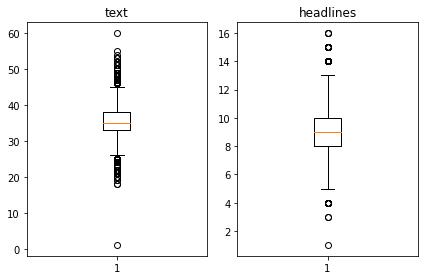

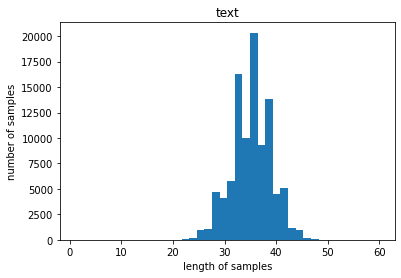

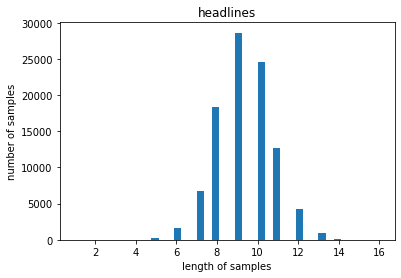

In [ ]:
text_len = [len(s.split()) for s in data['text']]
headlines_len = [len(s.split()) for s in data['headlines']]

print('텍스트 최소 길이: {}'.format(np.min(text_len)))
print('텍스트 최대 길이: {}'.format(np.max(text_len)))
print('텍스트 평균 길이: {}'.format(np.mean(text_len)))
print('요약 최소 길이: {}'.format(np.min(headlines_len)))
print('요약 최대 길이: {}'.format(np.max(headlines_len)))
print('요약 평균 길이: {}'.format(np.mean(headlines_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('text')
plt.subplot(1,2,2)
plt.boxplot(headlines_len)
plt.title('headlines')
plt.tight_layout()
plt.show()

plt.title('text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('headlines')
plt.hist(headlines_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

### **🍃 04-2_길이 분포를 활용해 적절한 최대 길이 설정**

- **텍스트 최대 길이 설정: 42**  
택스트 평균 길이는 35지만, 42 까지는 어느 정도 분포를 유지하고 있기 때문에 42로 설정  

- **요약 최대 길이 설정: 12**  
요약 평균 길이는 9지만, 12 까지는 어느 정도 분포를 유지하고 있기 때문에 12로 설정   

In [ ]:
text_max_len = 42
headlines_max_len = 12

### **🍃 04-3_샘플 비율 확인**

- **전체에서 text, headlines 별 최대 길이 내에 있는 샘플 비율 확인**

In [ ]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체에서 길이가 %s 이하인 샘플 비율: %s'%(max_len, (cnt / len(nested_list))))

In [ ]:
print('text')
below_threshold_len(text_max_len, data['text'])

print('\n')

print('headlines')
below_threshold_len(headlines_max_len,  data['headlines'])

text
전체에서 길이가 42 이하인 샘플 비율: 0.9750307415575045


headlines
전체에서 길이가 12 이하인 샘플 비율: 0.9880387394437048


### **🍃 04-4_전체 샘플 수 확인**



- **text, headlines의 최대 길이 내 전체 샘플 수**  
    - **.apply**  
    행 또는 열의 전체 원소 연산  

In [ ]:
data = data[data['text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['headlines'].apply(lambda x: len(x.split()) <= headlines_max_len)]
print('전체 샘플 수:', (len(data)))

전체 샘플 수: 94794


### **🍃 04-5_시작 토큰 및 종료 토큰 추가**

- **headlines(요약 데이터)에 시작 토큰, 종료 토큰 추가**  
- **데이터 전체의 상위 5개 부분 출력** 
    - **.apply**  
    행 또는 열의 전체 원소 연산    

In [ ]:
data['decoder_input'] = data['headlines'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['headlines'].apply(lambda x : x + ' eostoken')
data.head()

,headlines,text,decoder_input,decoder_target
0,upgrad learner switches to career in ml al wit...,saurav kant alumnus upgrad iiit pg program mac...,sostoken upgrad learner switches to career in ...,upgrad learner switches to career in ml al wit...
2,new zealand end rohit sharma led india match w...,new zealand defeated india wickets fourth odi ...,sostoken new zealand end rohit sharma led indi...,new zealand end rohit sharma led india match w...
3,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...,sostoken aegon life iterm insurance plan helps...,aegon life iterm insurance plan helps customer...
5,rahat fateh ali khan denies getting notice for...,pakistani singer rahat fateh ali khan denied r...,sostoken rahat fateh ali khan denies getting n...,rahat fateh ali khan denies getting notice for...
6,india get all out for their lowest odi total i...,india recorded lowest odi total new zealand ge...,sostoken india get all out for their lowest od...,india get all out for their lowest odi total i...


### **🍃 04-6_인코더(입력), 디코더(입력, 레이블) 저장**

**각각 Numpy 형식으로 저장**

In [ ]:
encoder_input = np.array(data['text'])
decoder_input = np.array(data['decoder_input'])
decoder_target = np.array(data['decoder_target'])

## **🌿 05_평가 데이터셋 분리**

### **🍃 05-1_정수 시퀀스 생성 및 순서 정의**

- **encoder_input과 크기와 형태가 같은 순서가 섞인 정수 시퀀스 생성**

In [ ]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[58080 14836 16201 ...  4148 55117 92182]


- **데이터 샘플 순서 정의**

In [ ]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

### **🍃 05-2_훈련 데이터와 테스트 데이터 분리**

- **전체 데이터 크기에서 20% 데이터를 훈련 데이터로 활용**  

In [ ]:
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터:', n_of_val)

테스트 데이터: 18958


-  **데이터 분리**

In [ ]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터:', len(encoder_input_train))
print('훈련 레이블:', len(decoder_input_train))
print('테스트 데이터:', len(encoder_input_test))
print('테스트 레이블:', len(decoder_input_test))

훈련 데이터: 75836
훈련 레이블: 75836
테스트 데이터: 18958
테스트 레이블: 18958


## **🌿 06_단어 집합 생성 및 정수 인코딩**

### **🍃 06-1_훈련 데이터 토크나이저**

- **Keras 토크나이저 사용 (입력된 데이터로부터 단어 집합 생성)**  
- **단어 집합 생성 및 각 단어에 고유 정수 부여**

In [ ]:
src_tokenizer = Tokenizer()
src_tokenizer.fit_on_texts(encoder_input_train)

### **🍃 06-2_훈련 데이터 단어 등장 빈도 확인**

- **6번을 기준으로 등장 빈도수 비중 확인**  

In [ ]:
threshold = 6
total_cnt = len(src_tokenizer.word_index)
rare_cnt = 0 
total_freq = 0 
rare_freq = 0

for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합의 크기 : 67806
등장 빈도가 5번 이하인 희귀 단어의 수: 44324
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 23482
단어 집합에서 희귀 단어의 비율: 65.36884641477155
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.136607807780563


### **🍃 06-3_훈련 데이터 단어 집합 크기 재설정**

- **등장 빈도가 5회 이하인 단어 정수 인코딩 과정, 훈련 데이터에서 제거**  
- **단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기가 23518개 이므로 어림잡아 23000개로 계산**

In [ ]:
src_vocab = 23000
src_tokenizer = Tokenizer(num_words=src_vocab)
src_tokenizer.fit_on_texts(encoder_input_train)

- **텍스트 시퀀스를 정수 시퀀스로 변환**

In [ ]:
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

- **정수 시퀀스 변환 확인**

In [ ]:
print(encoder_input_train[:3])

[[7916, 80, 552, 21608, 3298, 3209, 438, 1932, 45, 8335, 1781, 193, 3071, 33, 202, 14, 1383, 13933, 21608, 7917, 1781, 2221, 206, 4774, 17108, 22, 68, 118, 1635, 1820, 14, 550], [3771, 6358, 1733, 9598, 215, 3181, 427, 371, 2090, 173, 128, 8, 423, 895, 103, 17984, 9598, 190, 128, 4342, 11, 23, 384, 4291, 32, 16327, 126, 895, 2851, 100, 190, 335, 15621, 167], [12, 3694, 68, 433, 342, 8336, 4896, 6230, 17109, 779, 35, 3565, 46, 7918, 10222, 4896, 6230, 1788, 387, 9234, 3, 13, 1, 781, 98, 3695, 6359, 3544, 5377, 10937, 1015]]


### **🍃 06-4_headlines 데이터 토크나이저**

- **Keras 토크나이저 사용 (입력된 데이터로부터 단어 집합 생성)**  
- **단어 집합 생성 및 각 단어에 고유 정수 부여**

In [ ]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

### **🍃 06-5_headlines 데이터 단어 등장 빈도 확인**

- **4번을 기준으로 등장 빈도수 비중 확인**  

In [ ]:
threshold = 4
total_cnt = len(tar_tokenizer.word_index)
rare_cnt = 0
total_freq = 0 
rare_freq = 0

for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합의 크기 : 29512
등장 빈도가 3번 이하인 희귀 단어의 수: 16637
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 12875
단어 집합에서 희귀 단어의 비율: 56.373678503659534
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.254082721016315


### **🍃 06-6_headlines 데이터 집합 크기 재설정**

- **등장 빈도가 3회 이하인 단어 정수 인코딩 과정, 훈련 데이터에서 제거**    
- **단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기가 12875개 이므로 어림잡아 12000개로 계산**

In [ ]:
tar_vocab = 12000
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

- **텍스트 시퀀스를 정수 시퀀스로 변환**

In [ ]:
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

- **변환 확인**

In [ ]:
print('디코더(input)')
print('input ',decoder_input_train[:5])
print('\n')
print('디코더(target)')
print('decoder',decoder_target_train[:5])

디코더(input)
input  [[1, 3911, 167, 57, 2601, 229, 656, 765], [1, 2649, 4428, 830, 712, 44, 220, 718, 713, 69], [1, 46, 142, 6672, 8, 6673, 3066, 3, 2548, 7, 2026], [1, 367, 2233, 36, 409, 6048, 6049, 7522, 8630, 8631], [1, 1072, 242, 2824, 16, 18, 86, 72, 6, 885]]


디코더(target)
decoder [[3911, 167, 57, 2601, 229, 656, 765, 2], [2649, 4428, 830, 712, 44, 220, 718, 713, 69, 2], [46, 142, 6672, 8, 6673, 3066, 3, 2548, 7, 2026, 2], [367, 2233, 36, 409, 6048, 6049, 7522, 8630, 8631, 2], [1072, 242, 2824, 16, 18, 86, 72, 6, 885, 2]]


-  **훈련 데이터와 테스트 데이터 내 요약문의 길이가 1인 경우 변수에 저장 후 삭제**

In [ ]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 0
삭제할 테스트 데이터의 개수 : 0
훈련 데이터의 개수 : 75836
훈련 레이블의 개수 : 75836
테스트 데이터의 개수 : 18958
테스트 레이블의 개수 : 18958


### **🍃 06-7_패딩**

- **서로 다른 길이의 샘플들을 병렬 처리하기 위해 같은 길이로 패딩 작업 진행**

In [ ]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=headlines_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=headlines_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=headlines_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=headlines_max_len, padding='post')

## **🌿 07_모델 설계**

### **🍃 07-1_인코더 모델 설계**

- **임베딩 벡터 차원: 128**  
- **hidden state의 크기: 256**   
**hidden state:** LSTM에서 얼만큼의 수용력를 가질지를 정하는 파라미터(LSTM의 용량의 크기나, LSTM에서의 뉴런의 개수)  
- **LSTM : 3개 층**  
- **dropout 사용** 

In [ ]:
embedding_dim = 128
hidden_size = 256

encoder_inputs = Input(shape=(text_max_len,))

# 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

### **🍃 07-2_디코더 모델 설계**

- **LSTM의 입력 정의 시 initial_state의 인자값으로 인코더의 hidden state와 cell state의 값 삽입**    
- **출력 활성화 함수: softmax**  

In [ ]:
decoder_inputs = Input(shape=(None,))

# 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# LSTM
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

#출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

### **🍃 07-3_모델 정의**

In [ ]:
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)

### **🍃 07-4_모델 확인**

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 42)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 42, 128)      2944000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 42, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

### **🍃 07-5_어텐션 메커니즘 함수 설계**

- **TensorFlow 어텐션 함수를 활용한 디코더 출력층 결합**  

In [ ]:
# 어텐션 층
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])

# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

### **🍃 07-6_어텐션 메커니즘 함수 모델 정의**

In [ ]:
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)

### **🍃 07-7_어텐션 메커니즘 함수 모델 확인**

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 42)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 42, 128)      2944000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 42, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

## **🌿 08_모델 훈련**

### **🍃 08-1_모델 훈련**

- **옵티마이저**  
rmsprop  
-  **손실 함수**  
sparse_categorical_crossentropy  
    - **model.fit()**  
    모델 학습  

    - **EarlyStopping()**  
    epoch 크기에 상관 없이 모델 훈련을 최적점에서 멈춤  

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train,
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test),
          batch_size=256, callbacks=[es], epochs=50)

Epoch 1/50
297/297 [==============================] - 36s 101ms/step - loss: 5.7712 - val_loss: 5.3436
Epoch 2/50
297/297 [==============================] - 30s 101ms/step - loss: 5.1860 - val_loss: 4.9663
Epoch 3/50
297/297 [==============================] - 31s 105ms/step - loss: 4.8424 - val_loss: 4.7079
Epoch 4/50
297/297 [==============================] - 32s 108ms/step - loss: 4.5771 - val_loss: 4.5254
Epoch 5/50
297/297 [==============================] - 32s 106ms/step - loss: 4.3699 - val_loss: 4.3826
Epoch 6/50
297/297 [==============================] - 32s 106ms/step - loss: 4.1983 - val_loss: 4.2825
Epoch 7/50
297/297 [==============================] - 32s 107ms/step - loss: 4.0505 - val_loss: 4.1879
Epoch 8/50
297/297 [==============================] - 32s 107ms/step - loss: 3.9205 - val_loss: 4.1089
Epoch 9/50
297/297 [==============================] - 32s 107ms/step - loss: 3.8092 - val_loss: 4.0554
Epoch 10/50
297/297 [==============================] - 32s 107ms/step - l

### **🍃 08-2_모델 훈련 시각화**

- **loss 값 3.7 정도에서 더 이상 하락하지 않음**  

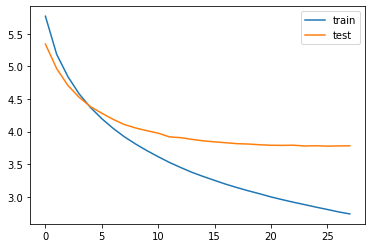

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## **🌿 09_인퍼런스 모델 구현**

### 🍃 **09-1_텍스트 데이터를 실제 데이터로 복원**  

- **text 집합 정수 : 단어 추출**  
- **headline 집합 정수 : 단어 추출**  
- **headline 집합 단어 : 정수 추출**  

In [ ]:
src_index_to_word = src_tokenizer.index_word
tar_word_to_index = tar_tokenizer.word_index
tar_index_to_word = tar_tokenizer.index_word

### 🍃 **09-2_인퍼런스 모델 설계**    

- **정답 문장이 없는 인퍼런스 단계에서는 만들어야 할 문장의 길이만큼 디코더가 반복 구조로 동작**  
- **인퍼런스를 위한 모델 설계 필요 (인코더 모델과 디코더 모델을 분리해서 설계)**  
- **문장의 다음 단어를 예측하기 위해 초기 상태를 이전 시점의 상태로 사용 (decode_sequence())**
- **LSTM의 state_h와 state_c를 버리지 않음**

In [ ]:
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태 저장
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

### 🍃 **09-3_어텐션 메커니즘 출력층 설계**    

- **어텐션 함수**  
- **디코더 출력층: softmax**  
    -  **Concatenate()**  
    배열 결합  

In [ ]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

### 🍃 **09-4_인퍼런스 단계에서 단어 시퀀스를 완성하는 함수 제작**    

- **np.zeros()**  
0으로 초기화된 shape 차원의 ndarray 배열 객체 반환  

- **.predict()**  
예측 생성  

In [ ]:
def decode_sequence(input_seq):
    e_out, e_h, e_c = encoder_model.predict(input_seq)

    # SOS 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    # stop_condition이 True가 될 때까지 반복
    while not stop_condition:

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <EOD>에 도달 or 최대 길이를 넘으면 stop
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (headlines_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트
        e_h, e_c = h, c

    return decoded_sentence

## **🌿 10_모델 테스트**

### **🍃 10-1_정수 시퀀스를 텍스트 시퀀스로 변환**

- **text의 정수 시퀀스에서 패딩을 위해 사용되는 숫자 0 제외**  

In [ ]:
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

- **headlines의 정수 시퀀스에서 숫자 0, 시작-종료 토큰 (인덱스) 제외**  

In [ ]:
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if ((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

### **🍃 10-2_실제 요약 및 예측 요약 비교**

- **원문/ 실제 요약 / 예측 요약 비교 출력**  

In [ ]:
for i in range(0, 50):
    print("원문:", seq2text(encoder_input_test[i]))
    print("실제 요약:", seq2summary(decoder_input_test[i]))
    print("예측 요약:", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문: inflation based wholesale price index accelerated eight month high november compared october government data showed inflation fuel power food prices index rose data released earlier week also showed retail inflation jumped month high november 
실제 요약: wholesale inflation hits month high of in november 
예측 요약:  wholesale inflation rises to month high of in july


원문: mcc world cricket committee backed discussions mcc england wales cricket club start design project manufacturers develop head protection bowlers committee included former indian skipper sourav ganguly former australian captain ricky ponting viewed footage recent accidents involving bowlers 
실제 요약: world cricket body backs for bowlers 
예측 요약:  de villiers to be named after captain in sa odi


원문: technology giant apple named meditation app calm iphone app year app compatible ios later offers guided meditation sessions sleeping stories breathing programs relaxing music apple also named photo editing app called photo ipad a

## **🌿 11_테스트 결과**

- **주어 및 핵심 단어가 동일하게 출력되는 경우가 많음**  
- **요약을 진행했다고 보기에 어려운 문장 구성이 많음**  
- **요약 내용이 일치하지 않는 경우가 많음**    

<hr>

# **🌲 EXPLORATION 07-4 : 추출적 요약**

## **🌿 01_데이터 import**

- **pandas를 활용한 데이터 import**  
- **urllib.request.urlretrieve**  
URL로 표시된 네트워크 객체를 로컬 파일로 복사  

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
re_text = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

## **🌿 02_데이터 요약**

- **summa.summarizer를 활용한 추출적 데이터 요약**  
    - **summarize()**  
    추출적 요약    
    - **ratio**  
    요약 시 원본에서 선택되는 문장 비율 (0-1 사이)


In [ ]:
for i in range(0, 50):
    print("원문:", re_text['text'][i])
    print("실제 요약:", re_text['headlines'][i])
    print("예측 요약:", summarize(re_text['text'][i], ratio=0.4))
    print("\n")

원문: Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers.
실제 요약: upGrad learner switches to career in ML & Al with 90% salary hike
예측 요약: upGrad's Online Power Learning has powered 3 lakh+ careers.


원문: Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after spending 2000 CRED coins. Users get one CRED coin per rupee of bill paid, which can be used to avail rewards from brands like Ixigo, BookMyShow, UberEats, Cult.Fit and more.
실제 요약: Delhi techie wins free food from Swiggy for one year on CRED
예측 요약: Users get one CRED coin per rupee of bill paid, whi

In [ ]:
for i in range(0, 50):
    print("원문:", re_text['text'][i])
    print("실제 요약:", re_text['headlines'][i])
    print("예측 요약:", summarize(re_text['text'][i], ratio=0.5))
    print("\n")

원문: Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers.
실제 요약: upGrad learner switches to career in ML & Al with 90% salary hike
예측 요약: upGrad's Online Power Learning has powered 3 lakh+ careers.


원문: Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after spending 2000 CRED coins. Users get one CRED coin per rupee of bill paid, which can be used to avail rewards from brands like Ixigo, BookMyShow, UberEats, Cult.Fit and more.
실제 요약: Delhi techie wins free food from Swiggy for one year on CRED
예측 요약: Users get one CRED coin per rupee of bill paid, whi

## **🌿 03_테스트 결과**

- **예측 요약의 경우 ratio를 0.5 미만으로 설정 시 요약이 안되는 문장이 발생**
- **중간 중간 인코딩 되지 않은 언어 출현**  
- **본문에서 사용하지 않은 단어 사용이 많음**  
- **요약 내용이 거의 일치하지 않음 / 요약 내용이 원문을 거의 그대로 추출하는 경우 발생**

<hr>

# **🌲 EXPLORATION 07-5 : 결론**

추상적 요약과 추출적 요약을 진행해보았다. 추상적 요약은 어느 정도 정확도가 있을 것 이라고 예상했는데, 주요 단어 및 주어 제외 문맥 상 흐름이나 내용은 잘 예측하지 못하는 모습을 보여주었다. 추출적 요약의 경우 ratio 값이 0.5 미만인 경우 많은 요약을 진행하지 않았고, 그래서 0.5로 설정해 진행했다. 그 결과 요약이 많이 진행되지 않았을 뿐 아니라 주요 단어 추출 조차 잘 해내지 못하는 모습을 보여주었고, 아니면 아예 반대로 원문을 거의 그대로 추출하는 경우가 발생했다. 그리고 요약 진행 시 인코딩이 진행되지 않은 글자들도 섞여 있어 좀 더 정규화가 필요하다고 느꼈다. 이번 진행을 통해 정규화의 중요성과 데이터가 부족한 경우 요약이 제대로 이루어지지 않음을 알 수 있었다.

<hr>